## 1. Global Rates

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

url = 'https://www.global-rates.com/en/interest-rates/central-banks/central-banks.aspx'

def style_negative(v):
    if v > 0:
        return 'background-color:salmon;' 
    else:
        return 'background-color:greenyellow;'

df = None
for df_temp in pd.read_html(url):
    if df_temp.iloc[0,0] == 'Name of interest rate':
        df_temp = df_temp.rename(columns=df_temp.iloc[0]).drop(df_temp.index[0])
        df = df_temp
        
df['change'] = pd.to_datetime(df['change']).dt.date
df['current rate'] = df['current rate'].str.replace('\xa0%', '').astype(float)
df['previous rate'] = df['previous rate'].str.replace('\xa0%', '').astype(float)
df['direction'] =  df['current rate'] - df['previous rate']
# df.sort_values(by='change', ascending=False).style.background_gradient(cmap='summer_r')   
df.drop('Name of interest rate', axis=1).sort_values(by='change', ascending=False).head(10)\
    .style.applymap(style_negative, subset='direction')\
    .background_gradient(cmap='Greens', subset=['current rate', 'previous rate'])

,country/region,current rate,direction,previous rate,change
25,Switzerland,1.000000,0.500000,0.500000,2022-12-15
6,Great Britain,3.500000,0.500000,3.000000,2022-12-15
22,Saudi Arabia,5.000000,0.500000,4.500000,2022-12-15
19,Norway,2.750000,0.250000,2.500000,2022-12-15
10,Denmark,1.900000,0.500000,1.400000,2022-12-15
11,Europe,2.500000,0.500000,2.000000,2022-12-15
17,Mexico,10.500000,0.500000,10.000000,2022-12-15
1,United States,4.500000,0.500000,4.000000,2022-12-14
7,Canada,4.250000,0.500000,3.750000,2022-12-07
13,India,6.250000,0.350000,5.900000,2022-12-07


## 2. Currencies

In [2]:
url_cur = 'https://tradingeconomics.com/currencies'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url_cur, headers=header)

ls_cur = pd.read_html(r.text)

In [3]:
cols = ls_cur[0].columns
[df if 'Major' in df.columns else df.set_axis(cols, axis=1, inplace=True)  for df in ls_cur]

df_cur = pd.concat(ls_cur)

In [4]:
pairs = ['EURUSD', 'USDRUB', 'GBPUSD', 'USDCHF', 'USDBGN']

str_cols = ['Weekly', 'Monthly', 'YoY', '%']
df_cur[str_cols] = df_cur[str_cols].replace('%', '', regex=True).astype(float)

df_cur = df_cur[df_cur['Major'].isin(pairs)][['Major', 'Price', '%', 'Weekly', 'Monthly', 'YoY']]

df_cur.drop_duplicates().style.background_gradient(cmap='Greens', subset=str_cols)\
    .background_gradient(cmap='Blues', subset='Price')
    

,Major,Price,%,Weekly,Monthly,YoY
0,EURUSD,1.064400,1.180000,-0.540000,1.320000,-6.290000
1,GBPUSD,1.209200,1.560000,-0.040000,-0.880000,-10.990000
6,USDCHF,0.927300,-0.940000,0.310000,-1.410000,0.970000
11,USDRUB,72.495500,1.890000,-0.010000,18.850000,-3.880000
20,USDBGN,1.837100,-1.160000,0.560000,-1.330000,6.560000


In [5]:
url_cry = 'https://tradingeconomics.com/crypto'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url_cry, headers=header)

df_cry = pd.read_html(r.text)[0]
df_cry.head(5)

,Crypto,Price,Day,%,Weekly,Monthly,YoY,MarketCap,Date
0,Bitcoin,16928.00000,4.0000,-0.03%,2.35%,-1.50%,-59.40%,"$320,977M",Jan/07
1,Ether,1264.90000,1.1800,-0.09%,5.49%,-1.03%,-58.93%,"$150,827M",Jan/07
2,Binance,261.10000,1.3000,0.51%,5.79%,-9.84%,-38.36%,"$42,686M",Jan/07
3,Cardano,0.27721,0.0018,-0.65%,12.98%,-11.88%,-76.52%,"$9,323M",Jan/07
4,Solana,13.23000,0.3098,-2.29%,32.70%,-3.43%,-90.69%,"$4,132M",Jan/07


In [6]:
str_cols = ['Weekly', 'Monthly', 'YoY', '%']
df_cry[str_cols] = df_cry[str_cols].replace('%', '', regex=True).astype(float)
df_cry = df_cry[['Crypto', 'Price', '%', 'Weekly', 'Monthly', 'YoY']]
df_cry.head(3).style.background_gradient(cmap='Greens', subset=str_cols)\
    .background_gradient(cmap='Blues', subset='Price')

,Crypto,Price,%,Weekly,Monthly,YoY
0,Bitcoin,16928.000000,-0.030000,2.350000,-1.500000,-59.400000
1,Ether,1264.900000,-0.090000,5.490000,-1.030000,-58.930000
2,Binance,261.100000,0.510000,5.790000,-9.840000,-38.360000


## 3. Oil

In [7]:
# collect data
url_oil = 'https://www.macrotrends.net/1369/crude-oil-price-history-chart'
df_oil = pd.read_html(url_oil)[0]

# clean
df_oil = df_oil.droplevel(level=0,axis=1)
df_oil['Annual% Change'] = df_oil['Annual% Change'].str.replace('%','').astype(float)
df_oil['AverageClosing Price'] = df_oil['AverageClosing Price'].str.replace(r'$','', regex=False).astype(float)
df_oil['date'] = pd.to_datetime(df_oil['Year'], format='%Y')
df_oil['Year'] = df_oil['date'].dt.year
df_oil.head(5)

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change,date
0,2023,75.54,$80.26,$80.26,$72.84,$73.73,-8.42,2023-01-01
1,2022,94.53,$76.08,$123.70,$71.59,$80.51,7.05,2022-01-01
2,2021,68.17,$47.62,$84.65,$47.62,$75.21,55.01,2021-01-01
3,2020,39.68,$61.17,$63.27,$11.26,$48.52,-20.64,2020-01-01
4,2019,56.99,$46.31,$66.24,$46.31,$61.14,35.42,2019-01-01


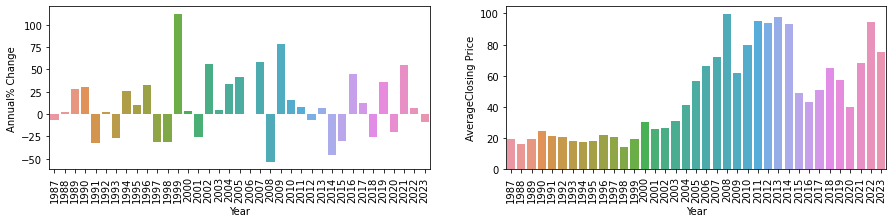

In [8]:
import seaborn as sns

fig, ax =plt.subplots(1,2)
fig.set_size_inches(15, 3)

g = sns.barplot(data=df_oil, x="Year", y='Annual% Change', ax=ax[0])
g1 = sns.barplot(data=df_oil, x="Year", y='AverageClosing Price', ax=ax[1])
g.tick_params(axis='x', rotation=90)
g1.tick_params(axis='x', rotation=90)

## 4. Resources

In [9]:
url_res = 'https://tradingeconomics.com/commodities'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url_res, headers=header)

ls_res = pd.read_html(r.text)

cols = list(ls_res[0].columns)
cols[0] = 'Resource'
cols = pd.Index(cols)
[df if 'Major' in df.columns else df.set_axis(cols, axis=1, inplace=True)  for df in ls_res]

df_res = pd.concat(ls_res)

In [11]:
str_cols = ['Weekly', 'Monthly', 'YoY', '%']
df_res[str_cols] = df_res[str_cols].replace(',', '', regex=True).replace('%', '', regex=True).astype(float)

cols = ['Resource', 'Price', '%', 'Weekly', 'Monthly', 'YoY']

ress = ['Crude Oil USD/Bbl', 'Gasoline USD/Gal', 'Gold USD/t.oz', 'Wheat USd/Bu', 'Rice USD/cwt']
df_res[df_res['Resource'].isin(ress)].reset_index()[cols].style.background_gradient(cmap='Greens', subset=str_cols)\
    .background_gradient(cmap='Blues', subset='Price')

,Resource,Price,%,Weekly,Monthly,YoY
0,Crude Oil USD/Bbl,73.770000,0.140000,-8.090000,2.060000,-5.950000
1,Gasoline USD/Gal,2.256600,-0.460000,-8.950000,8.040000,-2.130000
2,Gold USD/t.oz,1865.790000,1.780000,2.270000,4.450000,3.910000
3,Wheat USd/Bu,746.750000,0.000000,-5.710000,-0.370000,-1.550000
4,Rice USD/cwt,17.250000,-0.720000,-4.140000,3.230000,16.830000


## 5. Inflation

In [12]:
url_infla = 'https://tradingeconomics.com/country-list/inflation-rate'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url_infla, headers=header)

df_inf = pd.read_html(r.text)[0]


In [13]:
countries = ['China', 'United States', 'France', 'Germany', 'Euro Area', 'Russia']
df_inf[df_inf['Country'].isin(countries)].style.background_gradient(cmap='Blues', subset=['Last', 'Previous'])

,Country,Last,Previous,Reference,Unit
0,China,1.600000,2.100000,Nov/22,%
9,France,5.900000,6.200000,Dec/22,%
12,United States,7.100000,7.700000,Nov/22,%
16,Germany,8.600000,10.000000,Dec/22,%
17,Euro Area,9.200000,10.100000,Dec/22,%
21,Russia,12.000000,12.600000,Nov/22,%
